In [50]:
#General import
from sklearn import metrics
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy

#Qiskit import
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import XGate, SXGate, RZGate, CXGate
from qiskit.circuit.gate import Gate
algorithm_globals.random_seed = 13


#klearn import
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.svm import SVC

In [51]:
class Individual():
    
    def __init__(
        self,
        numberOfGenes: int,
        numberOfFeatures: int,
        numberOfQubits: int,
        gates = [Gate]
    ) -> None:
    
        self._numberOfFeatures = numberOfFeatures
        self._numberOfGenes = numberOfGenes
        self._numberOfQubits = numberOfQubits
        self._genotype =  [[None, None, None, None] for _ in range(numberOfGenes)]
        self._gates = gates
        
        
    def generateFirstIndividual(
        self
    ) -> None:
        
        for gene in range(self._numberOfGenes):
            
            gate = random.choice(self._gates)
            
            self._genotype[gene][0] = gate
            
            if gate == RZGate:
                
                qubit = random.randint(0, self._numberOfQubits-1)
                feature = random.randint(0, self._numberOfFeatures-1)
                self._genotype[gene][1] = qubit
                self._genotype[gene][2] = None
                self._genotype[gene][3] = feature
                
            elif gate == CXGate:
                
                control_qubit = random.randint(0, self._numberOfQubits-1)
                target_qubit = random.randint(0, self._numberOfQubits-1)
                while target_qubit == control_qubit:
                    target_qubit = random.randint(0, self._numberOfQubits-1)
                    
                self._genotype[gene][1] = target_qubit
                self._genotype[gene][2] = control_qubit
                self._genotype[gene][3] = None
                
            else:
                
                qubit = random.randint(0, self._numberOfQubits-1)
                self._genotype[gene][1] = qubit
                self._genotype[gene][2] = None
                self._genotype[gene][3] = None
                
                
    def getFenotype(
        self
    ) -> QuantumCircuit:
        
        trainingParams = ParameterVector('x', self._numberOfFeatures)
        
        fenotype = QuantumCircuit(self._numberOfQubits)

        for qubit in range(self._numberOfQubits):
            fenotype.append(RZGate(trainingParams[qubit]), [qubit])
        
        for gene in range(self._numberOfGenes):
                
                gate = self._genotype[gene][0]

                print(f"Processing gene {gene}, gate: {gate}")  # Debugging print

                
                if gate == RZGate:
                    fenotype.append(gate(trainingParams[self._genotype[gene][3]]), [self._genotype[gene][1]])
                    
                elif gate == CXGate:
                    fenotype.append(gate(), [self._genotype[gene][2], self._genotype[gene][1]])
                    
                else:
                    fenotype.append(gate(), [self._genotype[gene][1]])        

        return fenotype

        
    def mutate(
        self, 
        probability: float = 0.5
    ) -> None:
        
        if random.random() < probability: 
            
            gene = random.randint(0, self._numberOfGenes-1)
            
            self._genotype[gene] = [None, None, None, None]
            
            gate = random.choice(self._gates)
        
            self._genotype[gene][0] = gate
            
            if gate == RZGate:
                
                qubit = random.randint(0, self._numberOfQubits-1)
                feature = random.randint(0, self._numberOfFeatures-1)
                self._genotype[gene][1] = qubit
                self._genotype[gene][2] = None
                self._genotype[gene][3] = feature
                
            elif gate == CXGate:
                
                control_qubit = random.randint(0, self._numberOfQubits-1)
                target_qubit = random.randint(0, self._numberOfQubits-1)
                while target_qubit == control_qubit:
                    target_qubit = random.randint(0, self._numberOfQubits-1)
                    
                self._genotype[gene][1] = target_qubit
                self._genotype[gene][2] = control_qubit
                self._genotype[gene][3] = None
                
            else:
                
                qubit = random.randint(0, self._numberOfQubits-1)
                self._genotype[gene][1] = qubit
                self._genotype[gene][2] = None
                self._genotype[gene][3] = None
                


In [52]:
gates = [XGate, SXGate, RZGate, CXGate]
first = Individual(numberOfFeatures = 2, numberOfGenes = 4, numberOfQubits = 2, gates = gates)
first.generateFirstIndividual()
second = deepcopy(first)
second.mutate()
print(circuit_drawer(first.getFenotype()))
print(circuit_drawer(second.getFenotype()))

Processing gene 0, gate: <class 'qiskit.circuit.library.standard_gates.sx.SXGate'>
Processing gene 1, gate: <class 'qiskit.circuit.library.standard_gates.x.CXGate'>
Processing gene 2, gate: <class 'qiskit.circuit.library.standard_gates.rz.RZGate'>
Processing gene 3, gate: <class 'qiskit.circuit.library.standard_gates.x.CXGate'>
     ┌──────────┐┌────┐┌───┐┌──────────┐┌───┐
q_0: ┤ Rz(x[0]) ├┤ √X ├┤ X ├┤ Rz(x[0]) ├┤ X ├
     ├──────────┤└────┘└─┬─┘└──────────┘└─┬─┘
q_1: ┤ Rz(x[1]) ├────────■────────────────■──
     └──────────┘                            
Processing gene 0, gate: <class 'qiskit.circuit.library.standard_gates.sx.SXGate'>
Processing gene 1, gate: <class 'qiskit.circuit.library.standard_gates.x.CXGate'>
Processing gene 2, gate: <class 'qiskit.circuit.library.standard_gates.rz.RZGate'>
Processing gene 3, gate: <class 'qiskit.circuit.library.standard_gates.x.CXGate'>
     ┌──────────┐┌────┐┌───┐            ┌───┐
q_0: ┤ Rz(x[0]) ├┤ √X ├┤ X ├────────────┤ X ├
     ├──────────┤└

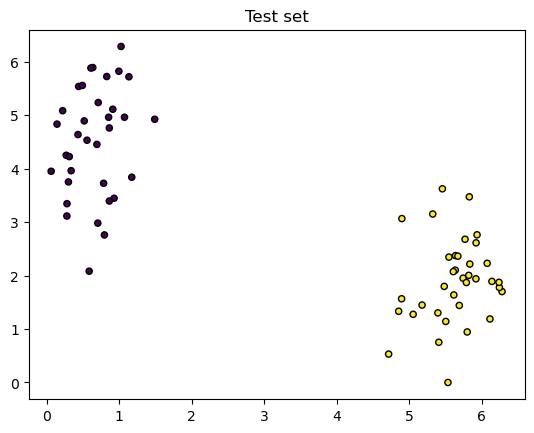

In [53]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.5, random_state=20)
X = MinMaxScaler(feature_range=(0, 2*np.pi)).fit_transform(X) #seems to have better resuults if compatible with the rotation encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13) #if I take more training values it crashes on my pc

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Test set')
plt.show()

In [54]:
maximumGenerations = 10
targetFitness = 0.95
numberOfGenes = 4
numberOfQubits = 2
gates = [XGate, SXGate, RZGate, CXGate]
k = 10

numberOfGenerations = 1
firstIndividual = Individual(numberOfFeatures = X_train.shape[1], numberOfGenes = numberOfGenes, numberOfQubits = X_train.shape[1], gates = gates)
bestIndividual = deepcopy(firstIndividual)
firstIndividual.generateFirstIndividual()
feature_map = firstIndividual.getFenotype()
print(circuit_drawer(feature_map))
kernel = FidelityQuantumKernel(feature_map=feature_map)
svc = SVC(kernel=kernel.evaluate)
svc.fit(X_train, y_train)
bestFitness = svc.score(X_test, y_test)

while bestFitness < targetFitness and numberOfGenerations < maximumGenerations: 

    print(f'Generation number {numberOfGenerations}')
    numberOfGenerations = numberOfGenerations + 1
    
    currentGeneration = []
    
    for i in range(k):
        currentGeneration.append(None)
        currentGeneration[i] = deepcopy(bestIndividual)

    for i in range(k):
        #currentGeneration[i].mutate()
        feature_map = currentGeneration[i].getFenotype()
        kernel = FidelityQuantumKernel(feature_map=feature_map)
        svc = SVC(kernel=kernel.evaluate)
        svc.fit(X_train, y_train)
        fitness = svc.score(X_test, y_test)
        
        if fitness > bestFitness:
            bestIndividual = deepcopy(currentGeneration[i])
            bestFitness = fitness
    
    print(circuit_drawer(bestIndividual.getFenotype()))
        

Processing gene 0, gate: <class 'qiskit.circuit.library.standard_gates.x.XGate'>
Processing gene 1, gate: <class 'qiskit.circuit.library.standard_gates.x.CXGate'>
Processing gene 2, gate: <class 'qiskit.circuit.library.standard_gates.rz.RZGate'>
Processing gene 3, gate: <class 'qiskit.circuit.library.standard_gates.x.CXGate'>
     ┌──────────┐┌───┐                      
q_0: ┤ Rz(x[0]) ├┤ X ├──■────────────────■──
     ├──────────┤└───┘┌─┴─┐┌──────────┐┌─┴─┐
q_1: ┤ Rz(x[1]) ├─────┤ X ├┤ Rz(x[0]) ├┤ X ├
     └──────────┘     └───┘└──────────┘└───┘
Generation number 1
Processing gene 0, gate: None


TypeError: 'NoneType' object is not callable